In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('/content/Train_Dataset_(1).csv')
data_test = pd.read_csv('/content/Test_Dataset_(1).csv')

In [3]:
data_train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [4]:
data_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [7]:
data_train.shape

(7810, 22)

In [8]:
data_test.shape

(2630, 21)

In [9]:
nan_rows = data_train.dropna(how='all')
nan_rows_indices = data_train.index.difference(nan_rows.index)
print('Rows with Nan values:')
print(nan_rows_indices)

Rows with Nan values:
RangeIndex(start=5180, stop=7810, step=1)


In [10]:
nan_rows = data_test.dropna(how='all')
nan_rows_data = data_test.index.difference(nan_rows.index)
print('Rows with Nan values:')
print(nan_rows_indices)

Rows with Nan values:
RangeIndex(start=5180, stop=7810, step=1)


In [11]:
data_train.shape

(7810, 22)

In [13]:
data_train = data_train.iloc[0:5180,:]

In [14]:
data_test['Attrition'] = 'datasettest'

In [15]:
data_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Attrition
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0,datasettest
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0,datasettest
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,0,5,1,22.0,18.0,3.0,3.0,M,18587.0,datasettest
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0,datasettest
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0,datasettest


In [16]:
data_test.shape

(2630, 22)

In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

Merging of train and test set

In [18]:
dataset = pd.concat([data_train, data_test], axis=0, ignore_index=True)

In [19]:
dataset.shape

(7810, 22)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          7810 non-null   float64
 1   Attrition           7810 non-null   object 
 2   Age                 7352 non-null   float64
 3   TravelProfile       7810 non-null   object 
 4   Department          7628 non-null   object 
 5   HomeToWork          7429 non-null   float64
 6   EducationField      7810 non-null   object 
 7   Gender              7734 non-null   object 
 8   HourlnWeek          7387 non-null   float64
 9   Involvement         7810 non-null   float64
 10  WorkLifeBalance     7810 non-null   float64
 11  Designation         7742 non-null   object 
 12  JobSatisfaction     7810 non-null   float64
 13  ESOPs               7810 non-null   float64
 14  NumCompaniesWorked  7810 non-null   float64
 15  OverTime            7810 non-null   float64
 16  Salary

In [21]:
dataset.isnull().sum()

,0
EmployeeID,0
Attrition,0
Age,458
TravelProfile,0
Department,182
HomeToWork,381
EducationField,0
Gender,76
HourlnWeek,423
Involvement,0


In [22]:
dataset.drop(['EmployeeID'], axis=1, inplace=True)
dataset.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [23]:
dataset_x = dataset.iloc[:,1:]
dataset_y = dataset.iloc[:,:1]

In [24]:
dataset_x.shape
dataset_x.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [25]:
dataset_y.shape

(7810, 1)

In [26]:
dataset_copy_x = dataset_x.copy()
dataset_copy_y = dataset_y.copy()

In [27]:
dataset_copy_x.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [28]:
dataset_copy_x.shape

(7810, 20)

In [29]:
dataset_y.shape

(7810, 1)

Exploratory Data Analysis

In [30]:
true_numeric = ['Age', 'HomeToWork', 'HourlnWeek', 'NumCompaniesWorked', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'MonthlyIncome', 'CurrentProfile']
category_numeric = ['Involvement', 'WorkLifeBalance', 'JobSatisfaction', 'ESOPs', 'OverTime', 'OverTime']
category = ['TravelProfile', 'Department', 'EducationField', 'Designation', 'Gender', 'MaritalStatus']

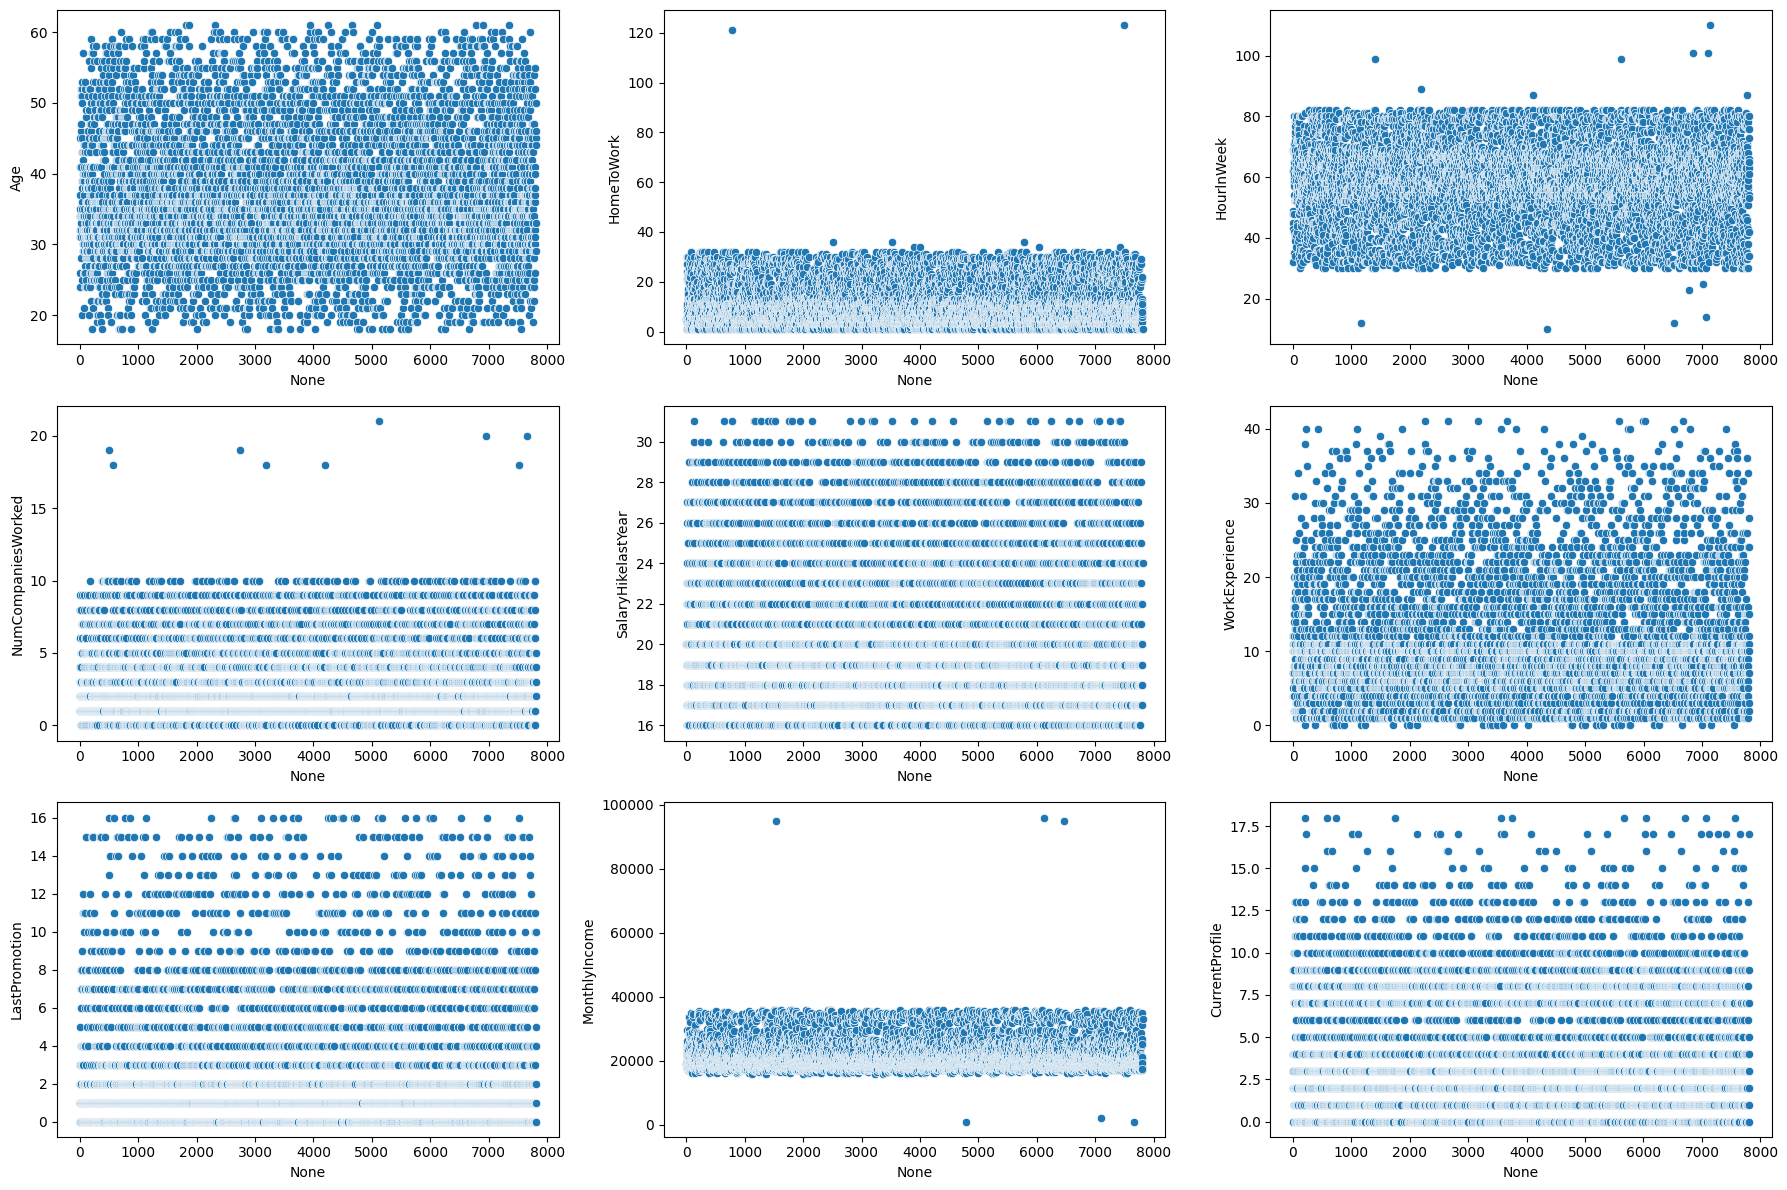

In [31]:
f, a=plt.subplots(3,3,figsize=(18,12),dpi=100)
ind = 0
for i in range (3):
  for j in range (3):
    sns.scatterplot(y = dataset_copy_x[true_numeric[ind]], x = dataset_copy_x[true_numeric[ind]].index,ax=a[i,j])
    ind+=1
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'HomeToWork'}>,
        <Axes: title={'center': 'HourlnWeek'}>,
        <Axes: title={'center': 'Involvement'}>],
       [<Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'ESOPs'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'SalaryHikelastYear'}>,
        <Axes: title={'center': 'WorkExperience'}>,
        <Axes: title={'center': 'LastPromotion'}>],
       [<Axes: title={'center': 'CurrentProfile'}>,
        <Axes: title={'center': 'MonthlyIncome'}>, <Axes: >, <Axes: >]],
      dtype=object)

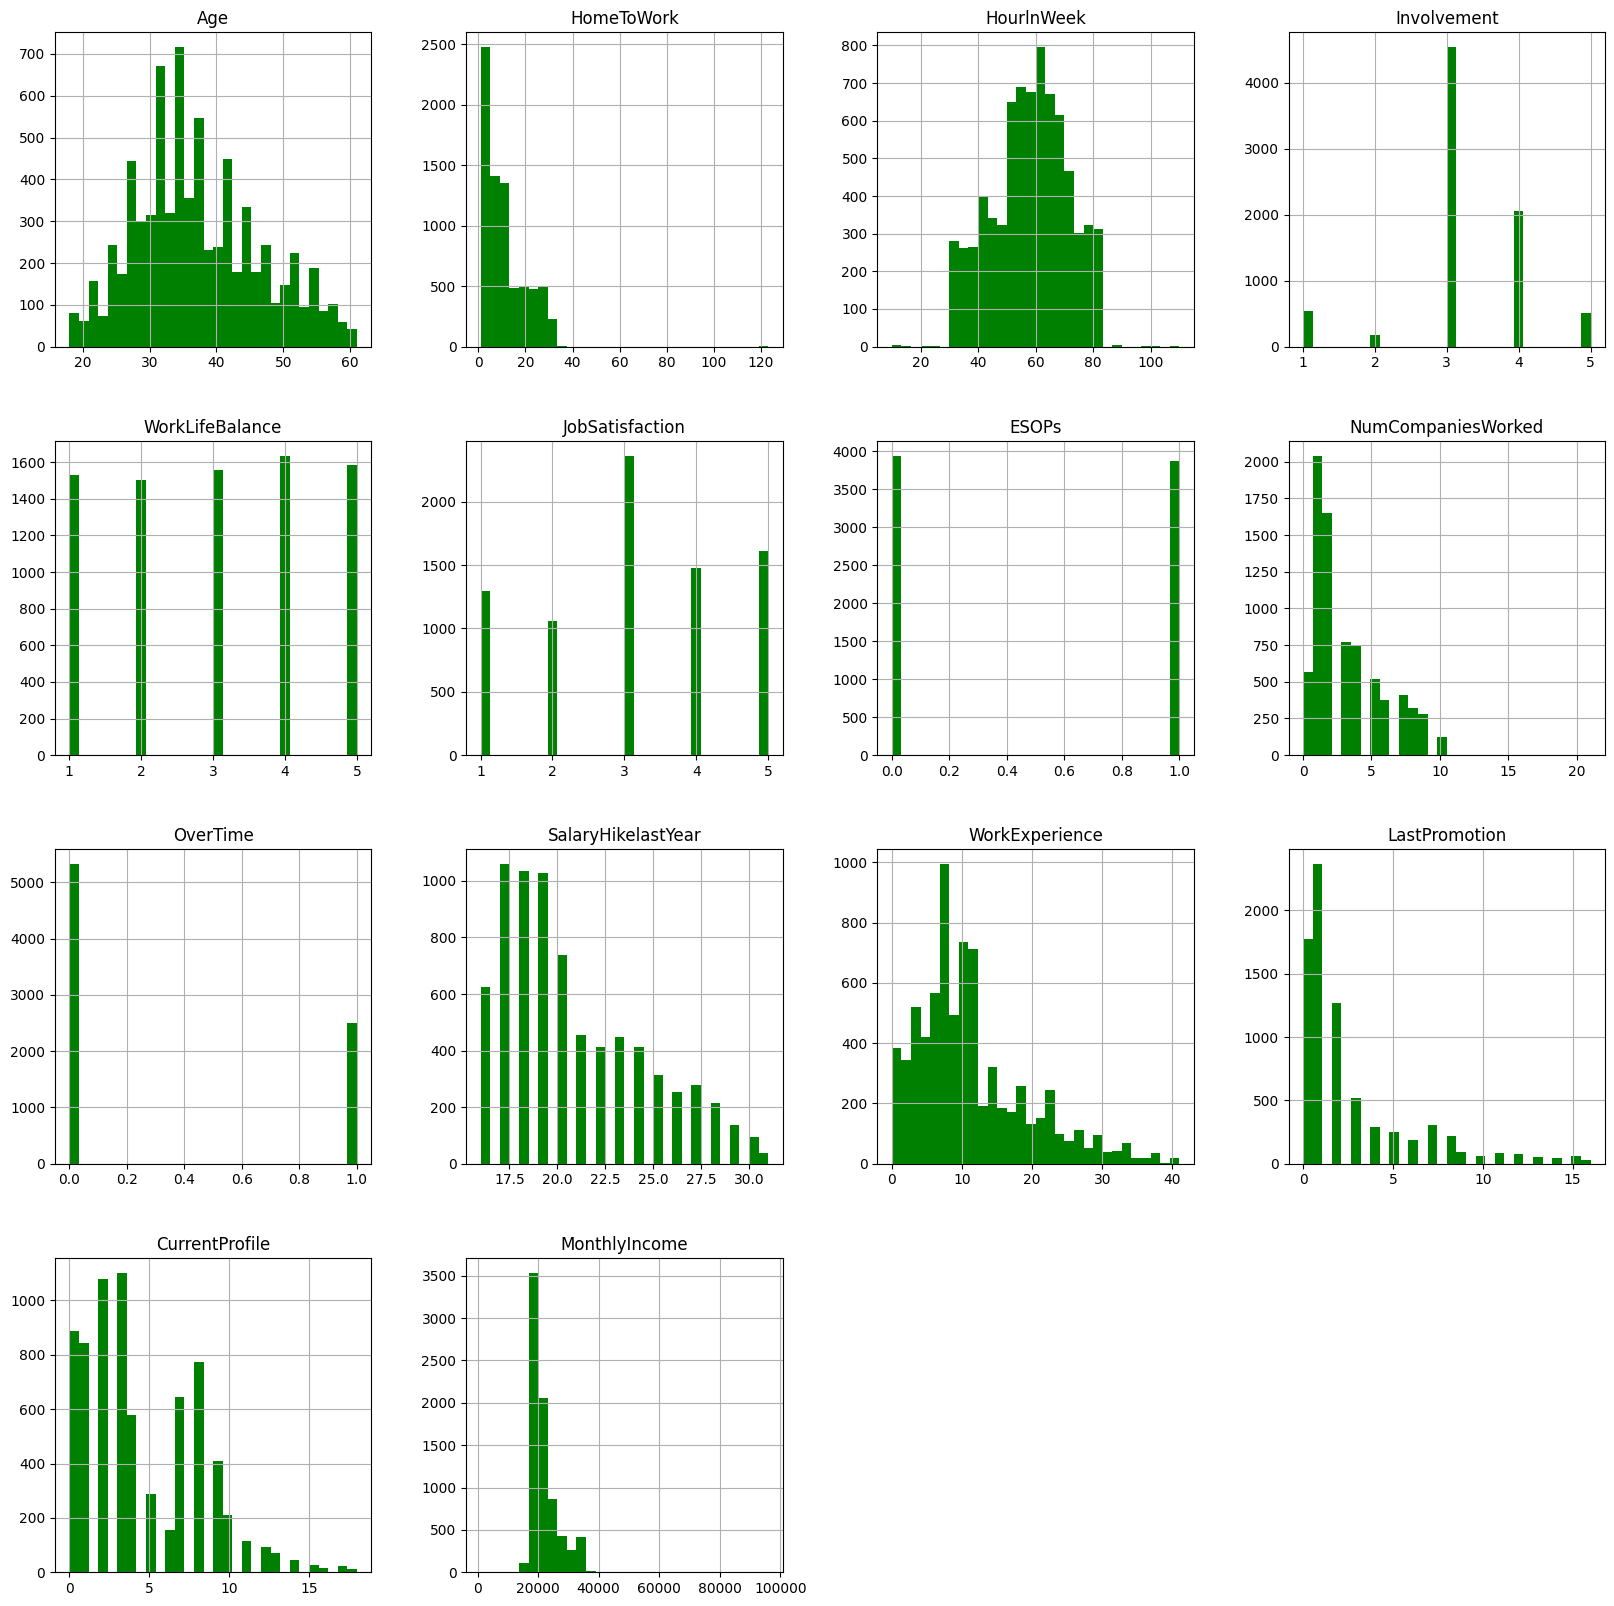

In [32]:
dataset_copy_x.hist(bins=30, figsize=(20,20), color='g')

Bivariate Analysis:

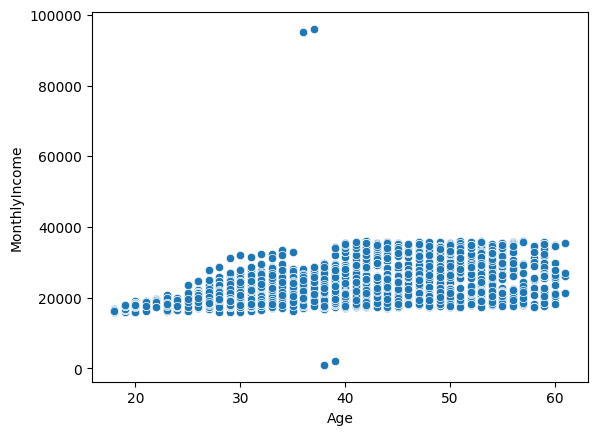

In [33]:
sns.scatterplot(x='Age', y='MonthlyIncome', data=dataset)
plt.show()

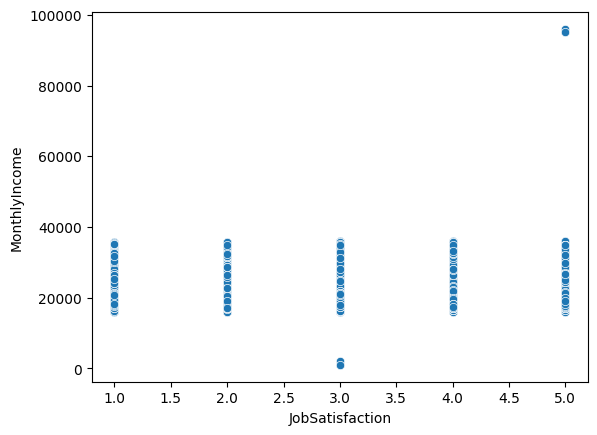

In [34]:
sns.scatterplot(x='JobSatisfaction', y='MonthlyIncome', data=dataset)
plt.show()

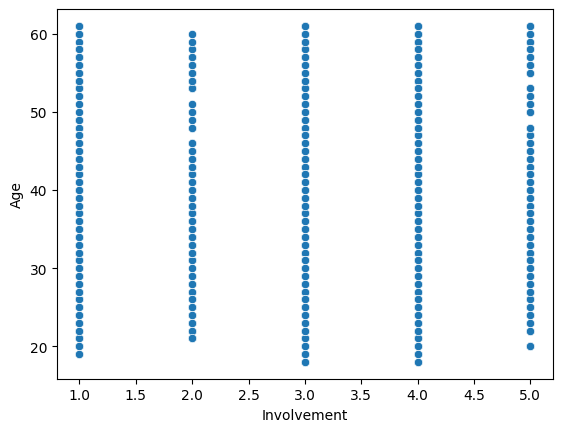

In [35]:
sns.scatterplot(x='Involvement', y='Age', data=dataset)
plt.show()

Multivariate Analysis:

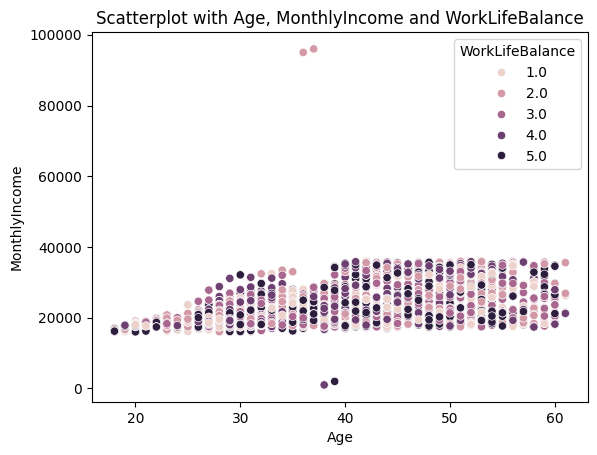

In [36]:
sns.scatterplot(x='Age', y='MonthlyIncome', hue='WorkLifeBalance', data=dataset)
plt.title('Scatterplot with Age, MonthlyIncome and WorkLifeBalance')
plt.show()

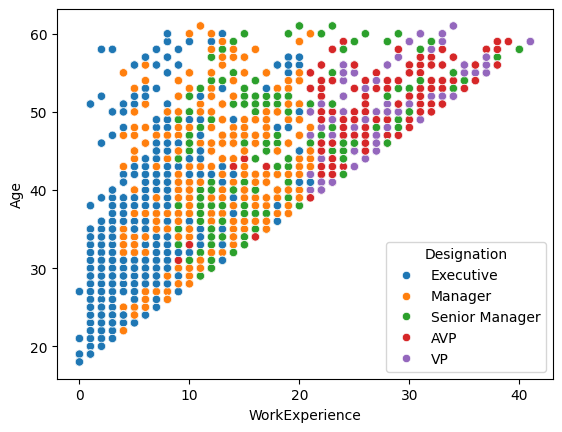

In [37]:
sns.scatterplot(x='WorkExperience', y='Age', hue='Designation', data=dataset)
plt.show()

In [38]:
dataset.describe()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,7352.000000,7429.000000,7387.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7547.000000,7501.000000,7683.000000,7365.000000,7684.000000
mean,37.215860,11.215507,57.940436,3.230986,3.031754,3.134699,0.495391,3.179385,0.319078,20.645157,11.286095,2.589093,4.426477,21736.822098
std,9.286258,8.590705,13.076675,0.876355,1.412770,1.341073,0.500011,2.625605,0.466149,3.712639,7.910095,3.257934,3.606972,4881.903674
min,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18377.000000
50%,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,10.000000,1.000000,3.000000,20229.000000
75%,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23465.750000
max,61.000000,123.000000,110.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,96000.000000


In [39]:
len(dataset)

7810

In [40]:
dataset_copy_x.isnull().sum()

,0
Age,458
TravelProfile,0
Department,182
HomeToWork,381
EducationField,0
Gender,76
HourlnWeek,423
Involvement,0
WorkLifeBalance,0
Designation,68


In [41]:
dataset_copy_x.isnull().sum()/len(dataset)*100

,0
Age,5.864277
TravelProfile,0.000000
Department,2.330346
HomeToWork,4.878361
EducationField,0.000000
Gender,0.973111
HourlnWeek,5.416133
Involvement,0.000000
WorkLifeBalance,0.000000
Designation,0.870679


In [42]:
for i in true_numeric:
    dataset_copy_x[i]=dataset_copy_x[i].fillna(dataset_copy_x[i].median())

In [43]:
dataset_copy_x.isnull().sum()

,0
Age,0
TravelProfile,0
Department,182
HomeToWork,0
EducationField,0
Gender,76
HourlnWeek,0
Involvement,0
WorkLifeBalance,0
Designation,68


In [44]:
for i in category:
    dataset_copy_x[i]=dataset_copy_x[i].fillna(dataset_copy_x[i].mode()[0])

In [45]:
dataset_copy_x.isnull().sum()

,0
Age,0
TravelProfile,0
Department,0
HomeToWork,0
EducationField,0
Gender,0
HourlnWeek,0
Involvement,0
WorkLifeBalance,0
Designation,0


Outliers:

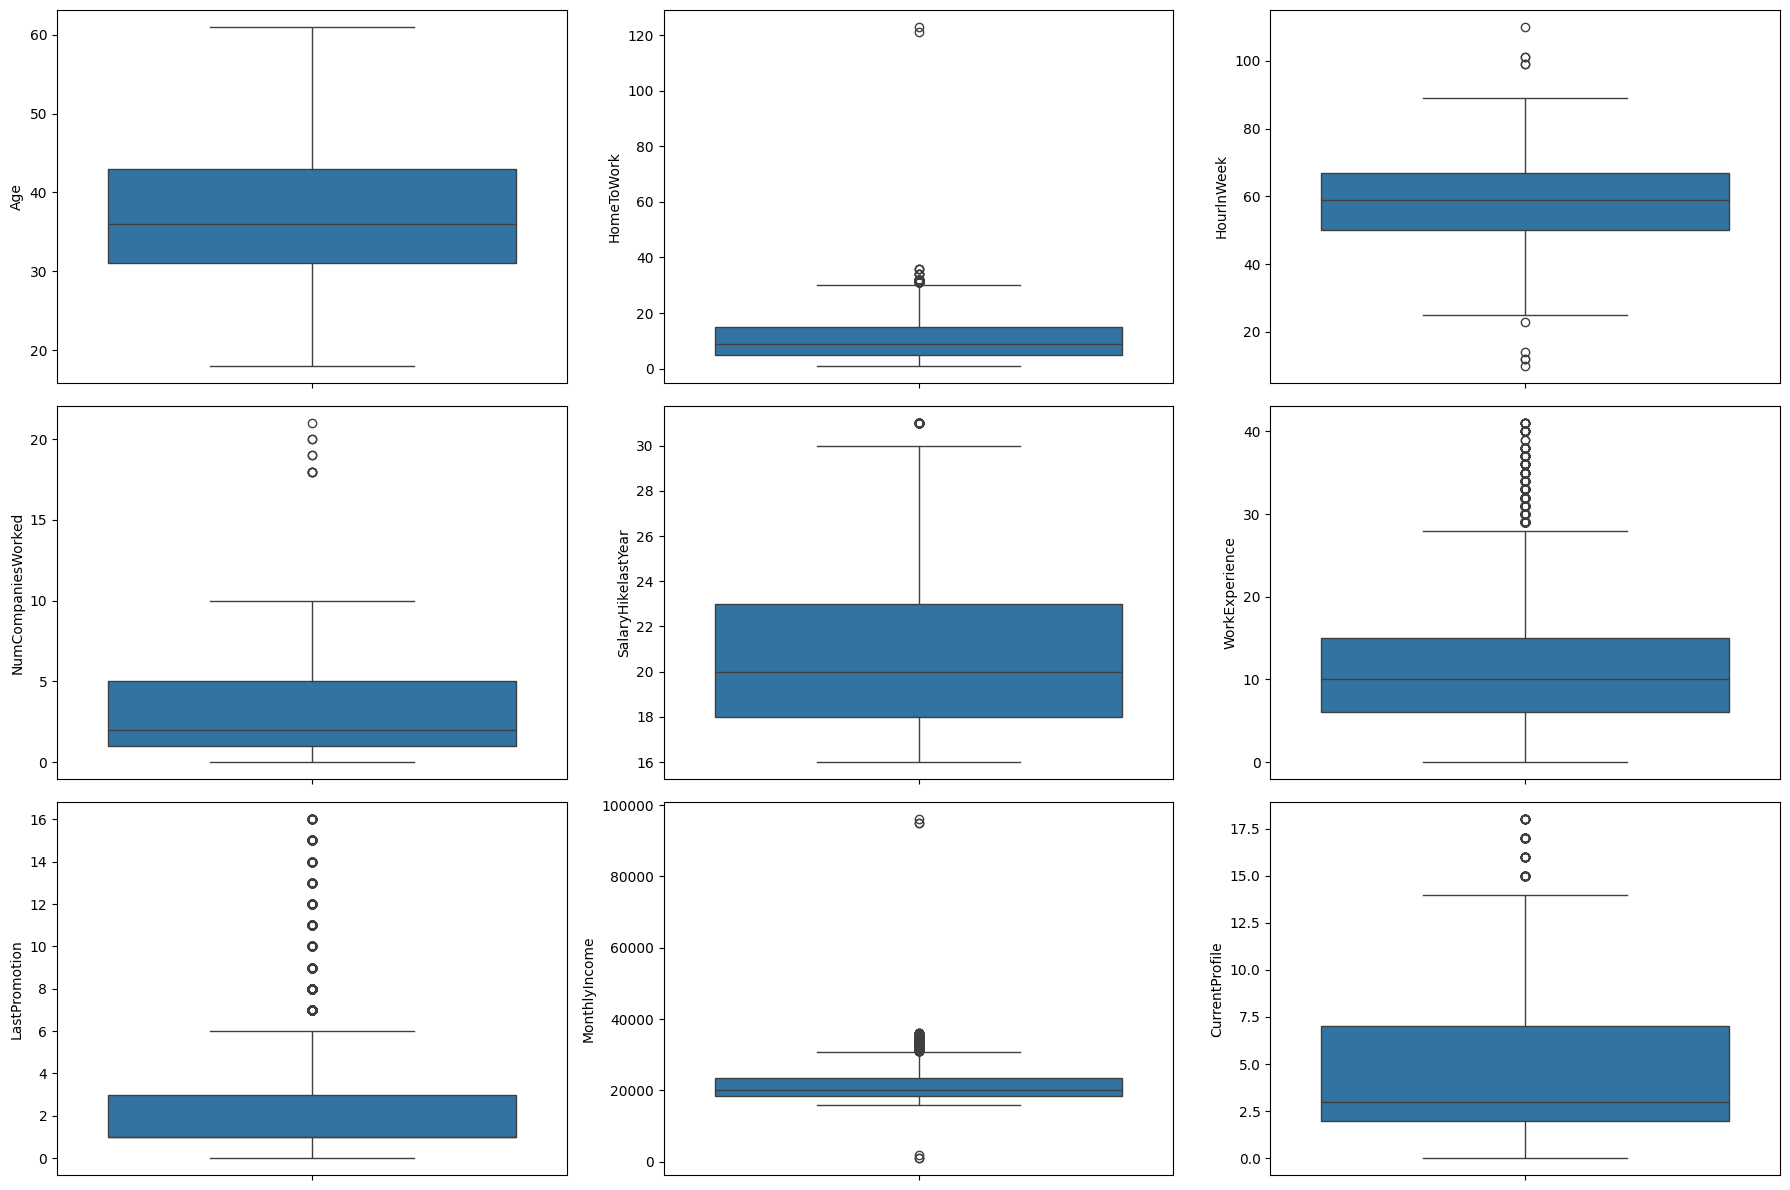

In [46]:
f,a=plt.subplots(3,3,figsize=(18,12),dpi=100)
num=0
for i in range(3):
    for j in range(3):
        sns.boxplot(dataset_copy_x[true_numeric[num]],ax=a[i,j])
        num+=1
plt.tight_layout()
plt.show()

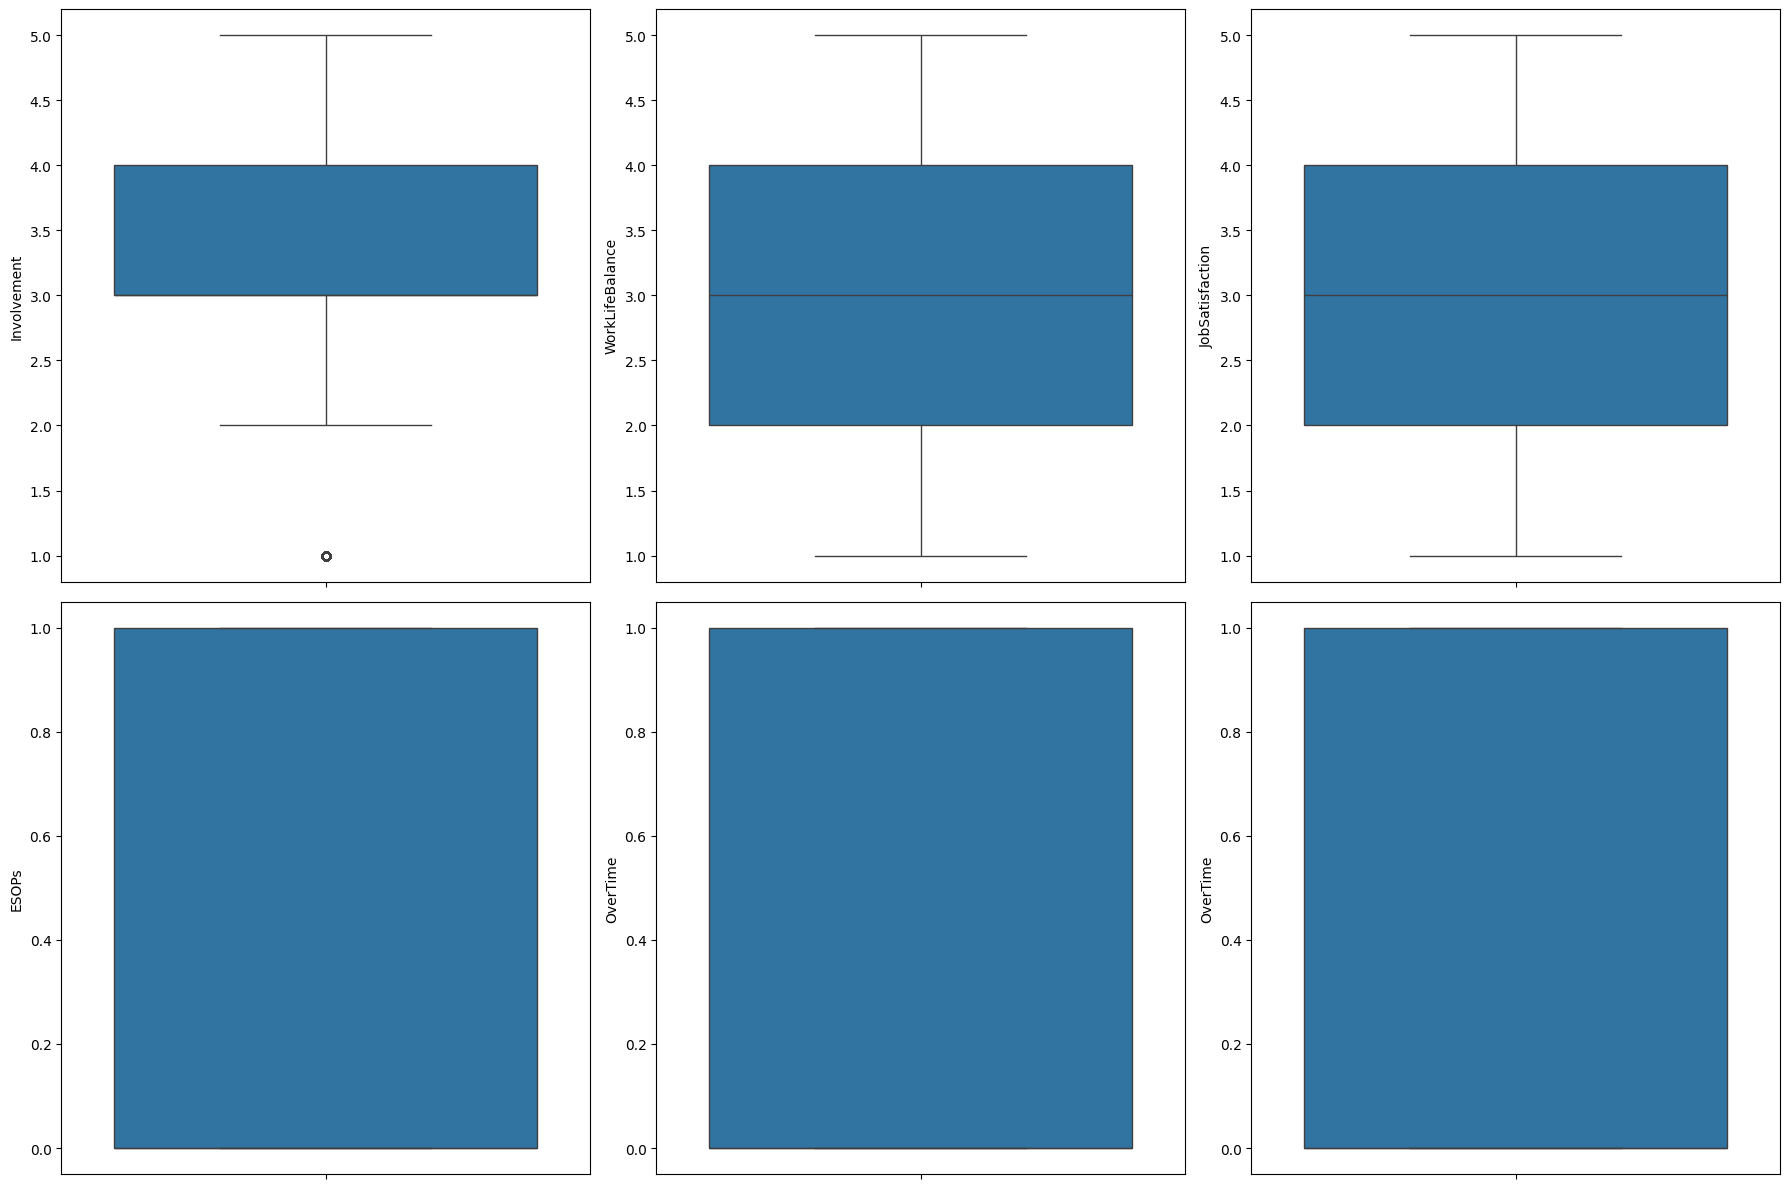

In [47]:
f,a=plt.subplots(2,3,figsize=(18,12),dpi=100)
num=0
for i in range(3):
    for j in range(3):
        if num<len(category_numeric): #Check to prevent the exceeding
           sns.boxplot(dataset_copy_x[category_numeric[num]],ax=a[i,j])
           num+=1
        else:
            break
plt.tight_layout()
plt.show()

Outliers Treatment:

In [48]:
dataset_copy_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 7810 non-null   float64
 1   TravelProfile       7810 non-null   object 
 2   Department          7810 non-null   object 
 3   HomeToWork          7810 non-null   float64
 4   EducationField      7810 non-null   object 
 5   Gender              7810 non-null   object 
 6   HourlnWeek          7810 non-null   float64
 7   Involvement         7810 non-null   float64
 8   WorkLifeBalance     7810 non-null   float64
 9   Designation         7810 non-null   object 
 10  JobSatisfaction     7810 non-null   float64
 11  ESOPs               7810 non-null   float64
 12  NumCompaniesWorked  7810 non-null   float64
 13  OverTime            7810 non-null   float64
 14  SalaryHikelastYear  7810 non-null   float64
 15  WorkExperience      7810 non-null   float64
 16  LastPr

In [49]:
def outlier_treatment(col):
    q3 = np.percentile(dataset_copy_x[true_numeric[col]],75)
    q1 = np.percentile(dataset_copy_x[true_numeric[col]],25)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    dataset_copy_x.loc[dataset_copy_x[true_numeric[col]] > upper_bound, true_numeric[col]] = upper_bound
    dataset_copy_x.loc[dataset_copy_x[true_numeric[col]] < lower_bound, true_numeric[col]] = lower_bound
    return dataset_copy_x

In [50]:
for i in true_numeric:
    dataset_copy_x = outlier_treatment(true_numeric.index(i))
    print(i)

Age
HomeToWork
HourlnWeek
NumCompaniesWorked
SalaryHikelastYear
WorkExperience
LastPromotion
MonthlyIncome
CurrentProfile


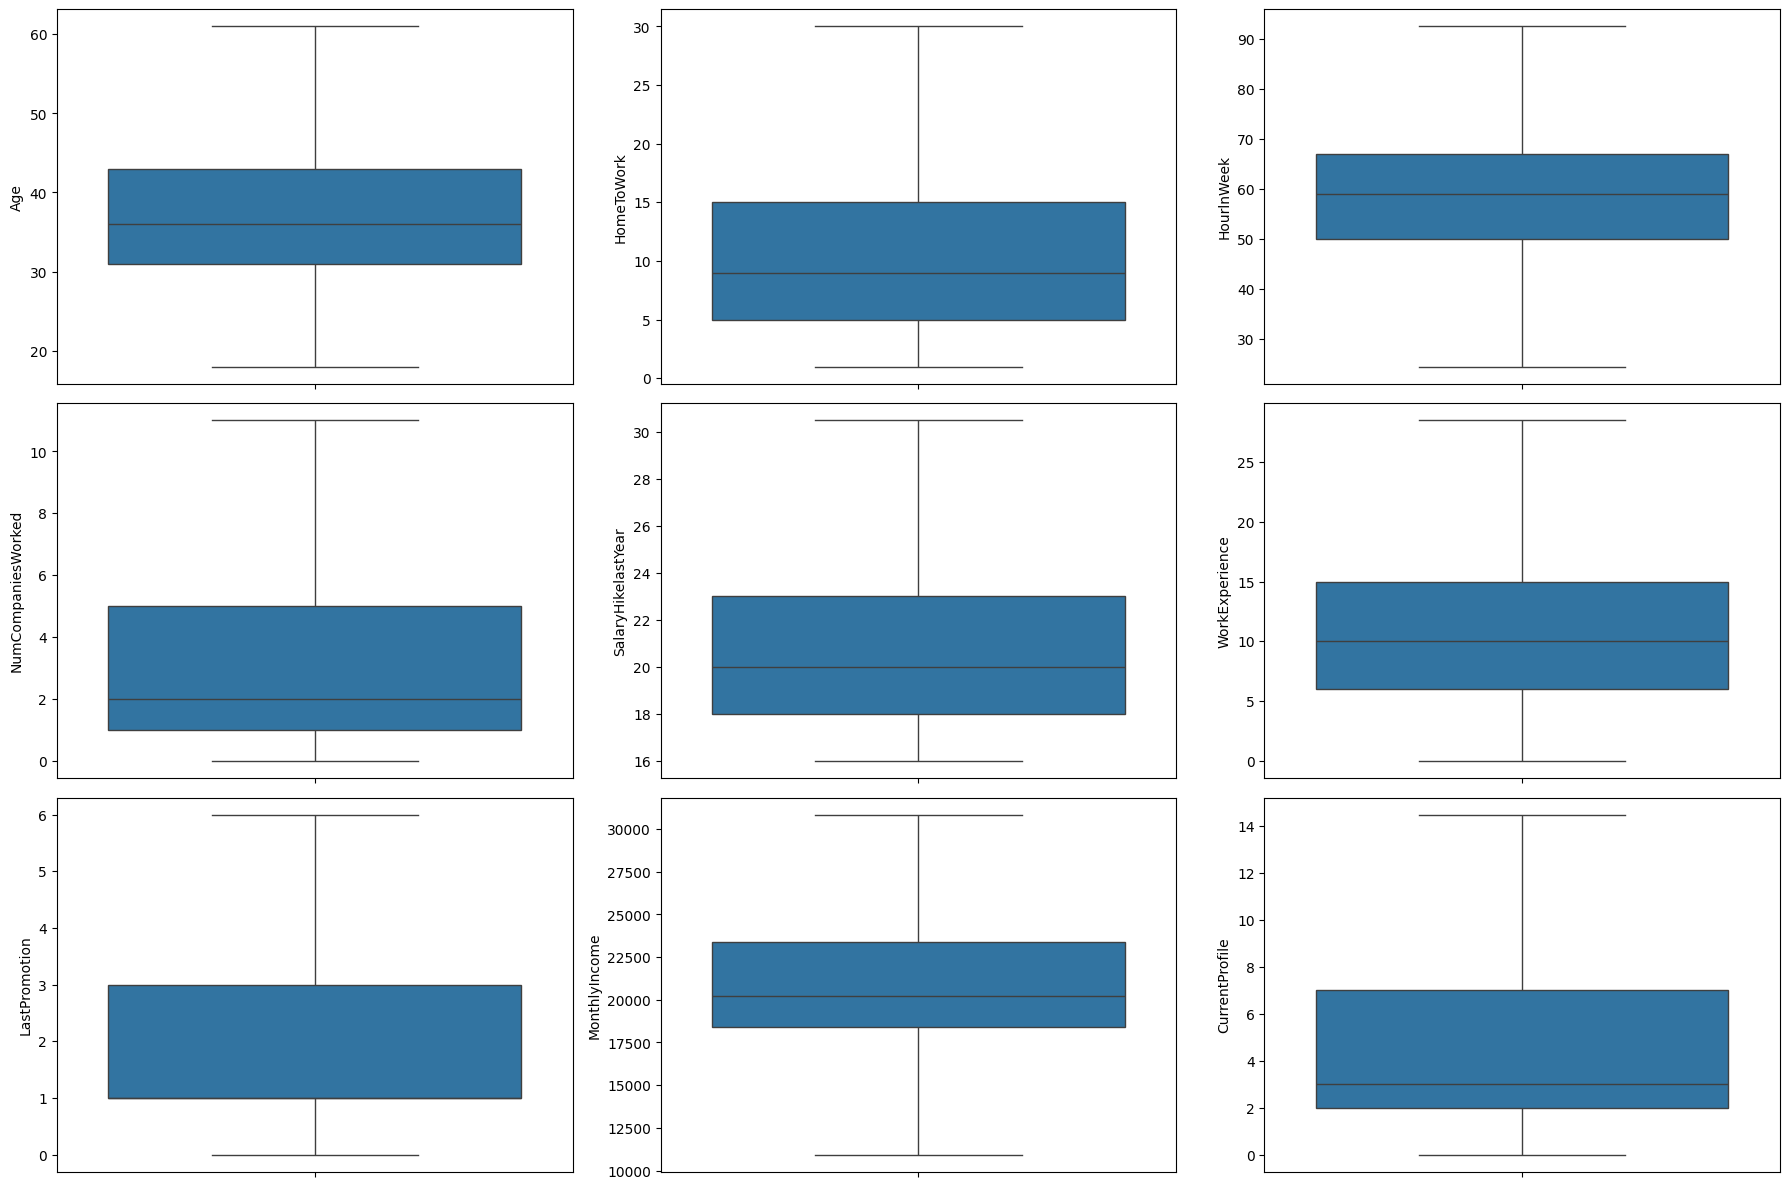

In [51]:
f,a=plt.subplots(3,3,figsize=(18,12),dpi=100)
num=0
for i in range(3):
    for j in range(3):
        sns.boxplot(dataset_copy_x[true_numeric[num]],ax=a[i,j])
        num+=1
plt.tight_layout()
plt.show()

Data Visualization:

In [52]:
dataset_copy_x.corr(numeric_only=True)

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
Age,1.000000,0.008450,0.001509,-0.028154,0.005039,-0.008412,-0.004014,0.290519,0.012396,-0.005644,0.662484,0.205880,0.220503,0.491001
HomeToWork,0.008450,1.000000,0.058723,-0.007175,0.003227,0.012949,0.009423,-0.004589,0.045382,0.061948,0.013131,0.029238,0.016490,0.013514
HourlnWeek,0.001509,0.058723,1.000000,-0.030060,0.012770,0.050412,0.003412,0.026407,0.038762,0.001359,-0.016341,-0.038174,-0.001196,-0.016414
Involvement,-0.028154,-0.007175,-0.030060,1.000000,-0.001271,-0.018523,0.019088,-0.000904,0.014226,0.003156,-0.011949,0.005346,-0.044737,0.003296
WorkLifeBalance,0.005039,0.003227,0.012770,-0.001271,1.000000,-0.004691,-0.001606,-0.010322,0.011447,-0.007374,-0.002340,-0.013383,-0.004460,0.005162
JobSatisfaction,-0.008412,0.012949,0.050412,-0.018523,-0.004691,1.000000,-0.004230,0.050303,-0.018983,-0.011640,0.002744,-0.008010,0.007958,-0.008413
ESOPs,-0.004014,0.009423,0.003412,0.019088,-0.001606,-0.004230,1.000000,-0.017881,0.015651,-0.031947,-0.000789,-0.004611,-0.001012,-0.002794
NumCompaniesWorked,0.290519,-0.004589,0.026407,-0.000904,-0.010322,0.050303,-0.017881,1.000000,-0.011384,0.005028,0.250239,0.003535,-0.068836,0.171826
OverTime,0.012396,0.045382,0.038762,0.014226,0.011447,-0.018983,0.015651,-0.011384,1.000000,-0.002979,-0.030179,-0.026399,-0.048319,-0.022482
SalaryHikelastYear,-0.005644,0.061948,0.001359,0.003156,-0.007374,-0.011640,-0.031947,0.005028,-0.002979,1.000000,-0.028053,-0.013971,-0.004213,-0.037864


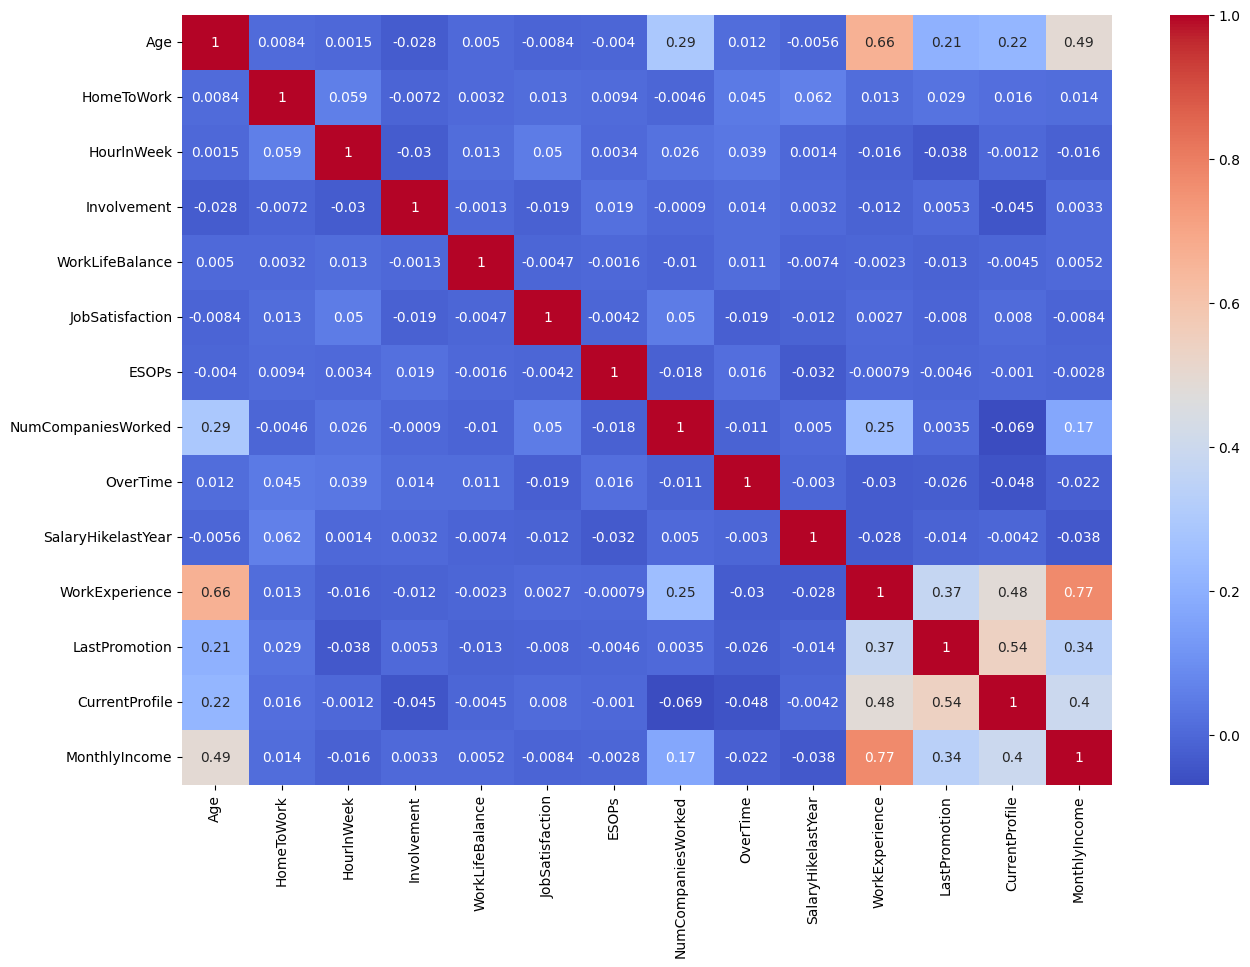

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset_copy_x.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

Encoding:

In [54]:
category

['TravelProfile',
 'Department',
 'EducationField',
 'Designation',
 'Gender',
 'MaritalStatus']

In [55]:
dataset_copy_x['TravelProfile'].value_counts()

,count
TravelProfile,
Rarely,5489
Yes,1580
No,741


In [56]:
dataset_copy_x['TravelProfile'] = dataset_copy_x['TravelProfile'].astype('category')
dataset_copy_x['TravelProfile'] = dataset_copy_x['TravelProfile'].cat.codes

In [57]:
dataset_copy_x['Department'].value_counts()

,count
Department,
Analytics,5076
Sales,2407
Marketing,327


In [58]:
dataset_copy_x['Department'] = dataset_copy_x['Department'].astype('category')
dataset_copy_x['Department'] = dataset_copy_x['Department'].cat.codes

In [59]:
dataset_copy_x['EducationField'].value_counts()

,count
EducationField,
Statistics,3169
CA,2417
Marketing Diploma,894
Engineer,750
Other,429
MBA,151


In [60]:
dataset_copy_x['EducationField'] = dataset_copy_x['EducationField'].astype('category')
dataset_copy_x['EducationField'] = dataset_copy_x['EducationField'].cat.codes

In [61]:
dataset_copy_x['Designation'].value_counts()

,count
Designation,
Executive,3133
Manager,2676
Senior Manager,1154
AVP,507
VP,340


In [62]:
dataset_copy_x['Designation'] = dataset_copy_x['Designation'].astype('category')
dataset_copy_x['Designation'] = dataset_copy_x['Designation'].cat.codes

In [63]:
dataset_copy_x['Gender'].value_counts()

,count
Gender,
Male,4744
Female,2020
F,1046


In [64]:
dataset_copy_x.Gender.replace({'F':'Female'},inplace=True)

In [65]:
dataset_copy_x['Gender'] = dataset_copy_x['Gender'].astype('category')
dataset_copy_x['Gender'] = dataset_copy_x['Gender'].cat.codes

In [66]:
dataset_copy_x['Gender'].value_counts()

,count
Gender,
1,4744
0,3066


In [67]:
dataset_copy_x['MaritalStatus'].value_counts()

,count
MaritalStatus,
Single,2709
Married,2455
Divorsed,1493
M,1153


In [68]:
dataset_copy_x.MaritalStatus.replace({'M':'Married'},inplace=True)

In [69]:
dataset_copy_x['MaritalStatus'] = dataset_copy_x['MaritalStatus'].astype('category')
dataset_copy_x['MaritalStatus'] = dataset_copy_x['MaritalStatus'].cat.codes

In [70]:
dataset_copy_x['MaritalStatus'].value_counts()

,count
MaritalStatus,
1,3608
2,2709
0,1493


In [71]:
dataset_copy_x.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,1,0,5.0,0,1,69.0,1.0,1.0,1,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0
1,32.0,2,2,5.0,5,0,62.0,4.0,3.0,1,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0
2,31.0,1,0,5.0,5,0,45.0,5.0,3.0,2,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,2,22091.0
3,34.0,2,2,10.0,5,0,32.0,3.0,2.0,2,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,0,20302.0
4,37.0,0,0,27.0,5,0,49.0,3.0,4.0,2,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,0,21674.0


In [72]:
dataset_copy_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 7810 non-null   float64
 1   TravelProfile       7810 non-null   int8   
 2   Department          7810 non-null   int8   
 3   HomeToWork          7810 non-null   float64
 4   EducationField      7810 non-null   int8   
 5   Gender              7810 non-null   int8   
 6   HourlnWeek          7810 non-null   float64
 7   Involvement         7810 non-null   float64
 8   WorkLifeBalance     7810 non-null   float64
 9   Designation         7810 non-null   int8   
 10  JobSatisfaction     7810 non-null   float64
 11  ESOPs               7810 non-null   float64
 12  NumCompaniesWorked  7810 non-null   float64
 13  OverTime            7810 non-null   float64
 14  SalaryHikelastYear  7810 non-null   float64
 15  WorkExperience      7810 non-null   float64
 16  LastPr

Feature Scaling:

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_copy_x = pd.DataFrame(scaler.fit_transform(dataset_copy_x), columns=dataset_copy_x.columns)

In [74]:
dataset_copy_x.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.395349,0.5,0.0,0.137931,0.0,1.0,0.654412,0.00,0.00,0.25,0.00,1.0,0.090909,1.0,0.275862,0.245614,0.333333,0.206897,0.5,0.401792
1,0.325581,1.0,1.0,0.137931,1.0,0.0,0.551471,0.75,0.50,0.25,0.25,0.0,0.727273,0.0,0.275862,0.140351,0.166667,0.206897,1.0,0.394417
2,0.302326,0.5,0.0,0.137931,1.0,0.0,0.301471,1.00,0.50,0.50,0.25,1.0,0.272727,0.0,0.689655,0.421053,0.166667,0.206897,1.0,0.560289
3,0.372093,1.0,1.0,0.310345,1.0,0.0,0.110294,0.50,0.25,0.50,0.75,1.0,0.090909,0.0,0.482759,0.175439,0.166667,0.206897,0.0,0.470530
4,0.441860,0.0,0.0,0.896552,1.0,0.0,0.360294,0.50,0.75,0.50,0.75,1.0,0.727273,0.0,0.344828,0.421053,0.166667,0.620690,0.0,0.539367


Splitting again:

In [75]:
train_x = dataset_copy_x.iloc[:5180,:]
test_x = dataset_copy_x.iloc[5180:,:]

In [76]:
print(train_x.shape)
print(test_x.shape)

(5180, 20)
(2630, 20)


In [77]:
train_y = dataset_y[dataset_y['Attrition']!='datasettest']

In [78]:
train_y.shape

(5180, 1)

In [79]:
train_y.value_counts()

,count
Attrition,
0.0,3735
1.0,1445


In [80]:
train_y_new = train_y.copy()
train_x_new = train_x.copy()

In [81]:
train_y_new.value_counts()

,count
Attrition,
0.0,3735
1.0,1445


In [82]:
train_y_new = train_y_new.astype('int')

Imbalance Treatment:

In [83]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [84]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
train_x_over, train_y_over = ros.fit_resample(train_x_new, train_y_new)
print('Imbalance Sample:', train_y_new.value_counts())
print('Balanced Sample:', train_y_over.value_counts())

Imbalance Sample: Attrition
0            3735
1            1445
Name: count, dtype: int64
Balanced Sample: Attrition
0            3735
1            3735
Name: count, dtype: int64


Splitting data for model building:

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_x_over, train_y_over, test_size=0.2, random_state=42)

In [86]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(5976, 20) (1494, 20) (5976, 1) (1494, 1)


In [87]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

Logistic Regression:

In [89]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [90]:
y_pred_train = log_reg.predict(x_train)
y_pred_val = log_reg.predict(x_val)
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Validation Accuracy:', accuracy_score(y_val, y_pred_val))

Train Accuracy: 0.7349397590361446
Validation Accuracy: 0.7456492637215528


Cross validation Score:

In [91]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.73327759 0.73891213 0.74728033 0.70878661 0.73556485]
0.7327643050055276


In [92]:
print('Training Accuracy scores:', scores)
print('Training Accuracy mean:', scores.mean())
print('Training Accuracy min:', scores.min())
print('Training Accuracy max:', scores.max())

Training Accuracy scores: [0.73327759 0.73891213 0.74728033 0.70878661 0.73556485]
Training Accuracy mean: 0.7327643050055276
Training Accuracy min: 0.7087866108786611
Training Accuracy max: 0.7472803347280335


In [93]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2993
           1       0.73      0.73      0.73      2983

    accuracy                           0.73      5976
   macro avg       0.73      0.73      0.73      5976
weighted avg       0.73      0.73      0.73      5976



In [94]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.538871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 5976
Model:                          Logit   Df Residuals:                     5956
Method:                           MLE   Df Model:                           19
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.2226
Time:                        04:00:19   Log-Likelihood:                -3220.3
converged:                       True   LL-Null:                       -4142.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -1.6868      0.190     -8.875      0.000      -2.059      -1.314
Trave

In [95]:
x_train.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
410,0.279070,0.5,0.0,0.344828,0.8,0.0,0.242647,1.00,0.00,0.50,1.00,0.0,0.363636,0.0,0.206897,0.350877,0.166667,0.551724,0.5,0.742117
6246,0.325581,0.5,1.0,0.275862,1.0,1.0,0.786765,1.00,1.00,0.50,0.50,0.0,0.454545,1.0,0.551724,0.456140,1.000000,0.551724,0.0,0.564353
4048,0.302326,0.5,1.0,0.310345,0.6,0.0,0.742647,0.50,0.00,0.50,1.00,1.0,0.727273,0.0,0.275862,0.315789,0.166667,0.206897,0.5,0.494462
438,0.465116,0.5,0.0,0.862069,1.0,0.0,0.389706,0.75,0.25,0.75,0.75,0.0,0.272727,0.0,0.413793,0.666667,0.000000,0.068966,0.5,0.809650
5566,0.883721,0.5,0.0,0.137931,0.0,1.0,0.816176,0.50,0.75,1.00,1.00,1.0,0.545455,1.0,0.206897,0.877193,0.333333,0.344828,0.0,1.000000


In [96]:
x_train_new = x_train.copy()
x_train_new.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
410,0.279070,0.5,0.0,0.344828,0.8,0.0,0.242647,1.00,0.00,0.50,1.00,0.0,0.363636,0.0,0.206897,0.350877,0.166667,0.551724,0.5,0.742117
6246,0.325581,0.5,1.0,0.275862,1.0,1.0,0.786765,1.00,1.00,0.50,0.50,0.0,0.454545,1.0,0.551724,0.456140,1.000000,0.551724,0.0,0.564353
4048,0.302326,0.5,1.0,0.310345,0.6,0.0,0.742647,0.50,0.00,0.50,1.00,1.0,0.727273,0.0,0.275862,0.315789,0.166667,0.206897,0.5,0.494462
438,0.465116,0.5,0.0,0.862069,1.0,0.0,0.389706,0.75,0.25,0.75,0.75,0.0,0.272727,0.0,0.413793,0.666667,0.000000,0.068966,0.5,0.809650
5566,0.883721,0.5,0.0,0.137931,0.0,1.0,0.816176,0.50,0.75,1.00,1.00,1.0,0.545455,1.0,0.206897,0.877193,0.333333,0.344828,0.0,1.000000


In [97]:
x_train_new.drop(['Designation','WorkExperience','ESOPs'], axis=1, inplace=True)
x_train_new.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,NumCompaniesWorked,OverTime,SalaryHikelastYear,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
410,0.279070,0.5,0.0,0.344828,0.8,0.0,0.242647,1.00,0.00,1.00,0.363636,0.0,0.206897,0.166667,0.551724,0.5,0.742117
6246,0.325581,0.5,1.0,0.275862,1.0,1.0,0.786765,1.00,1.00,0.50,0.454545,1.0,0.551724,1.000000,0.551724,0.0,0.564353
4048,0.302326,0.5,1.0,0.310345,0.6,0.0,0.742647,0.50,0.00,1.00,0.727273,0.0,0.275862,0.166667,0.206897,0.5,0.494462
438,0.465116,0.5,0.0,0.862069,1.0,0.0,0.389706,0.75,0.25,0.75,0.272727,0.0,0.413793,0.000000,0.068966,0.5,0.809650
5566,0.883721,0.5,0.0,0.137931,0.0,1.0,0.816176,0.50,0.75,1.00,0.545455,1.0,0.206897,0.333333,0.344828,0.0,1.000000


In [98]:
x_val_new = x_val.copy()
x_val_new.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
4562,0.418605,0.5,0.0,0.068966,0.8,1.0,0.551471,0.75,1.00,0.25,0.50,1.0,0.545455,1.0,0.275862,0.245614,0.000000,0.000000,1.0,0.309374
576,0.395349,0.5,0.0,0.931034,1.0,1.0,0.360294,0.50,0.25,0.50,0.50,0.0,0.181818,0.0,0.344828,0.596491,0.000000,0.482759,0.5,0.549853
4335,0.441860,0.5,0.0,0.620690,1.0,0.0,0.301471,0.00,0.00,0.25,1.00,0.0,0.181818,0.0,0.413793,0.666667,1.000000,0.206897,1.0,0.392310
2268,0.255814,0.5,0.0,0.068966,1.0,0.0,0.654412,1.00,0.50,0.25,0.75,1.0,0.727273,1.0,0.206897,0.385965,0.666667,0.551724,1.0,0.365868
3362,0.627907,0.5,0.0,0.413793,0.8,1.0,0.272059,0.50,1.00,0.50,0.00,1.0,0.272727,1.0,0.206897,0.350877,0.333333,0.275862,0.5,0.579054


In [99]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_new, y_train)

LogisticRegression()

In [100]:
x_val_new.drop(['Designation','WorkExperience','ESOPs'], axis=1, inplace=True)

In [101]:
y_pred_train_new = log_reg.predict(x_train_new)
y_pred_val_new = log_reg.predict(x_val_new)
print('Train Accuracy:', accuracy_score(y_train, y_pred_train_new))
print('Test Accuracy:', accuracy_score(y_val, y_pred_val_new))

Train Accuracy: 0.7389558232931727
Test Accuracy: 0.7443105756358769


In [102]:
training_accuracy = cross_val_score(log_reg, x_train_new, y_train, cv=5)
print('Training Accuracy scores:', training_accuracy)
print('Training Accuracy mean:', training_accuracy.mean())
print('Training Accuracy min:', training_accuracy.min())
print('Training Accuracy max:', training_accuracy.max())

Training Accuracy scores: [0.73411371 0.74476987 0.74811715 0.70543933 0.73974895]
Training Accuracy mean: 0.7344378052364225
Training Accuracy min: 0.705439330543933
Training Accuracy max: 0.7481171548117155


In [103]:
print(classification_report(y_val, y_pred_val_new))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       742
           1       0.74      0.75      0.75       752

    accuracy                           0.74      1494
   macro avg       0.74      0.74      0.74      1494
weighted avg       0.74      0.74      0.74      1494



Decision Tree:

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [105]:
dt2 = DecisionTreeClassifier(criterion='gini', random_state=0)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [106]:
y_pred_train_dt1 = dt1.predict(x_train)
y_pred_val_dt1 = dt1.predict(x_val)
print('Train Accuracy dt1:', accuracy_score(y_train, y_pred_train_dt1))
print('Test Accuracy dt1:', accuracy_score(y_val, y_pred_val_dt1))

Train Accuracy dt1: 1.0
Test Accuracy dt1: 0.9772423025435074


In [107]:
y_pred_train_dt2 = dt2.predict(x_train)
y_pred_val_dt2 = dt2.predict(x_val)

In [108]:
print('Train Accuracy dt2:', accuracy_score(y_train, y_pred_train_dt2))
print('Test Accuracy dt2:', accuracy_score(y_val, y_pred_val_dt2))

Train Accuracy dt2: 1.0
Test Accuracy dt2: 0.9752342704149933


In [109]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(dt2, x_train, y_train, cv=5)
print('Training Accuracy dt2:', accuracy_scores)
print('Training Accuracy dt2 mean:', accuracy_scores.mean())
print('Trainig Accuracy dt2 min:', accuracy_scores.min())
print('Training Accuracy dt2 max:', accuracy_scores.max())

Training Accuracy dt2: [0.97240803 0.9665272  0.9707113  0.97322176 0.95564854]
Training Accuracy dt2 mean: 0.9677033626733463
Trainig Accuracy dt2 min: 0.9556485355648535
Training Accuracy dt2 max: 0.9732217573221758


Evaluation of model:

In [110]:
print(classification_report(y_train, y_pred_train_dt2))
print(classification_report(y_val, y_pred_val_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2993
           1       1.00      1.00      1.00      2983

    accuracy                           1.00      5976
   macro avg       1.00      1.00      1.00      5976
weighted avg       1.00      1.00      1.00      5976

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       742
           1       0.96      0.99      0.98       752

    accuracy                           0.98      1494
   macro avg       0.98      0.98      0.98      1494
weighted avg       0.98      0.98      0.98      1494



In [111]:
print(classification_report(y_train, y_pred_train_dt1))
print(classification_report(y_val, y_pred_val_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2993
           1       1.00      1.00      1.00      2983

    accuracy                           1.00      5976
   macro avg       1.00      1.00      1.00      5976
weighted avg       1.00      1.00      1.00      5976

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       742
           1       0.96      1.00      0.98       752

    accuracy                           0.98      1494
   macro avg       0.98      0.98      0.98      1494
weighted avg       0.98      0.98      0.98      1494



In [112]:
print(confusion_matrix(y_val, y_pred_val_dt2))
print(confusion_matrix(y_train, y_pred_train_dt2))

[[711  31]
 [  6 746]]
[[2993    0]
 [   0 2983]]


In [113]:
print(confusion_matrix(y_val, y_pred_val_dt1))
print(confusion_matrix(y_train, y_pred_train_dt1))

[[710  32]
 [  2 750]]
[[2993    0]
 [   0 2983]]


Post pruning:

In [114]:
dt2.feature_importances_

array([0.10346752, 0.0286642 , 0.02501108, 0.089158  , 0.03741566,
       0.01417574, 0.07796201, 0.04083679, 0.00155082, 0.0168357 ,
       0.05424276, 0.00094185, 0.03227224, 0.09106528, 0.04121911,
       0.09592473, 0.02898841, 0.04278924, 0.05687395, 0.12060492])

In [115]:
pd.DataFrame(dt2.feature_importances_, columns=['Importance'], index=dataset_copy_x.columns)

,Importance
Age,0.103468
TravelProfile,0.028664
Department,0.025011
HomeToWork,0.089158
EducationField,0.037416
Gender,0.014176
HourlnWeek,0.077962
Involvement,0.040837
WorkLifeBalance,0.001551
Designation,0.016836


In [117]:
depth = dt2.tree_.max_depth
print('dt2 depth:', depth)

dt2 depth: 18


In [118]:
prun_tree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=20)
prun_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [119]:
y_pred_train_prun = prun_tree.predict(x_train)
y_pred_val_prun = prun_tree.predict(x_val)
print('Train Accuracy:', accuracy_score(y_train, y_pred_train_prun))
print('Test Accuracy:', accuracy_score(y_val, y_pred_val_prun))

Train Accuracy: 1.0
Test Accuracy: 0.9752342704149933


In [120]:
print(classification_report(y_train, y_pred_train_prun))
print(classification_report(y_val, y_pred_val_prun))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2993
           1       1.00      1.00      1.00      2983

    accuracy                           1.00      5976
   macro avg       1.00      1.00      1.00      5976
weighted avg       1.00      1.00      1.00      5976

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       742
           1       0.96      0.99      0.98       752

    accuracy                           0.98      1494
   macro avg       0.98      0.98      0.98      1494
weighted avg       0.98      0.98      0.98      1494



In [121]:
print(confusion_matrix(y_train, y_pred_train_prun))
print(confusion_matrix(y_val, y_pred_val_prun))

[[2993    0]
 [   0 2983]]
[[711  31]
 [  6 746]]


Random Forest:

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [123]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_val)
print('Train Accuracy:', accuracy_score(y_train, y_pred_rf_train))
print('Test Accuracy:', accuracy_score(y_val, y_pred_rf_test))

Train Accuracy: 1.0
Test Accuracy: 0.9926372155287818


In [124]:
training_accuracy = cross_val_score(rf, x_train, y_train, cv=5)
print('Training Accuracy scores:', training_accuracy)
print('Training Accuracy mean:', training_accuracy.mean())
print('Training Accuracy min:', training_accuracy.min())
print('Training Accuracy max:', training_accuracy.max())

Training Accuracy scores: [0.98996656 0.99246862 0.9958159  0.98828452 0.97824268]
Training Accuracy mean: 0.9889556541330237
Training Accuracy min: 0.9782426778242678
Training Accuracy max: 0.99581589958159


In [125]:
x_train_over, y_train_over = ros.fit_resample(x_train, y_train)
x_train_over1, x_val_over1, y_train_over1, y_val_over1 = train_test_split(x_train_over, y_train_over, test_size=0.2, random_state=42)

In [126]:
print(x_train_over1.shape, x_val_over1.shape, y_train_over1.shape, y_val_over1.shape)

(4788, 20) (1198, 20) (4788, 1) (1198, 1)


In [127]:
y_train_over.value_counts()

,count
Attrition,
0,2993
1,2993


In [128]:
y_pred_rf_train_over = rf.predict(x_train_over1)
y_pred_rf_test_over = rf.predict(x_val_over1)
print('Train Accuracy:', accuracy_score(y_train_over1, y_pred_rf_train_over))
print('Test Accuracy:', accuracy_score(y_val_over1, y_pred_rf_test_over))

Train Accuracy: 1.0
Test Accuracy: 1.0


In [130]:
training_accuracy = cross_val_score(rf, x_train_over1, y_train_over1, cv=5)
print('Training Accuracy scores:', training_accuracy)
print('Training Accuracy mean:', training_accuracy.mean())
print('Training Accuracy min:', training_accuracy.min())
print('Training Accuracy max:', training_accuracy.max())

Training Accuracy scores: [0.98851775 0.98643006 0.9874739  0.98014629 0.97805643]
Training Accuracy mean: 0.9841248857446395
Training Accuracy min: 0.9780564263322884
Training Accuracy max: 0.988517745302714


Hyperparameter Tuning:

In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 12, 13],
    'max_depth': [7, 8, 9],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 12, 13]})

In [135]:
grid_search_predict = grid_search.predict(x_val)
print('Accuracy:', accuracy_score(y_val, grid_search_predict))
print('Best Tuned Hyperparameter:', grid_search.best_params_)

Accuracy: 0.9477911646586346
Best Tuned Hyperparameter: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 13}


In [136]:
RF_Model = RandomForestClassifier(n_estimators=12, min_samples_split=2, min_samples_leaf=1, max_depth=8)
RF_Model.fit(x_train, y_train)
y_pred_rf_train = RF_Model.predict(x_train)
y_pred_rf_test = RF_Model.predict(x_val)
print('Train Accuracy:', accuracy_score(y_train, y_pred_rf_train))
print('Test Accuracy:', accuracy_score(y_val, y_pred_rf_test))

Train Accuracy: 0.9501338688085676
Test Accuracy: 0.9170013386880856


In [137]:
training_accuracy = cross_val_score(RF_Model, x_train, y_train, cv=5)
print('Training Accuracy scores:', training_accuracy)
print('Training Accuracy mean:', training_accuracy.mean())
print('Training Accuracy min:', training_accuracy.min())
print('Training Accuracy max:', training_accuracy.max())

Training Accuracy scores: [0.92391304 0.91966527 0.93640167 0.90962343 0.91297071]
Training Accuracy mean: 0.9205148262688738
Training Accuracy min: 0.9096234309623431
Training Accuracy max: 0.9364016736401674


In [138]:
features = pd.DataFrame(RF_Model.feature_importances_, index=dataset_copy_x.columns, columns=['Importance'])
features.sort_values(by='Importance', ascending=False)

,Importance
OverTime,0.119073
MonthlyIncome,0.093928
Age,0.086296
WorkExperience,0.084707
CurrentProfile,0.083756
HomeToWork,0.069803
JobSatisfaction,0.058518
MaritalStatus,0.055396
Designation,0.047684
NumCompaniesWorked,0.046477


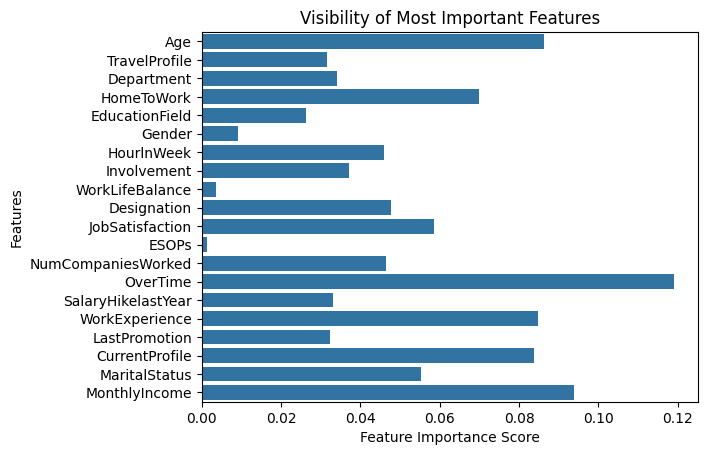

In [139]:
sns.barplot(x=features.Importance, y=features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visibility of Most Important Features')
plt.show()

Conclusion:

In [140]:
testdata_prediction = RF_Model.predict(test_x)

In [141]:
testdata_prediction

array([1, 0, 0, ..., 0, 1, 0])

In [142]:
testdata_prediction.shape

(2630,)

In [143]:
testdata_prediction = pd.DataFrame(testdata_prediction, columns=['Attrition'])

In [145]:
Final_prediction = pd.concat([test_x, testdata_prediction], axis=1)

In [146]:
Final_prediction.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Attrition
5180,0.000000,0.0,0.0,0.275862,0.0,1.0,0.816176,0.50,0.25,0.25,...,1.0,0.090909,0.0,0.068966,0.000000,0.000000,0.000000,1.0,0.300041,NaN
5181,0.046512,0.5,0.0,0.931034,1.0,0.0,0.507353,0.00,0.50,0.25,...,1.0,0.181818,1.0,0.137931,0.070175,0.166667,0.206897,1.0,0.404903,NaN
5182,0.744186,0.5,0.0,0.620690,0.0,0.0,0.757353,0.50,0.50,0.25,...,0.0,0.454545,1.0,0.413793,0.631579,0.500000,0.206897,0.5,0.384483,NaN
5183,0.325581,0.5,1.0,0.758621,1.0,0.0,0.713235,1.00,0.25,0.50,...,0.0,0.363636,1.0,0.068966,0.175439,0.500000,0.206897,0.5,0.483424,NaN
5184,0.488372,0.5,0.0,0.206897,0.0,1.0,0.257353,0.75,0.00,0.75,...,1.0,0.363636,0.0,0.275862,0.315789,0.166667,0.482759,0.5,0.705791,NaN
